<a href="https://colab.research.google.com/github/elsaimo/4106_Final_project/blob/main/MohamedFinalProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
import torch
import pandas as pd
import category_encoders as ce
from sklearn.preprocessing import StandardScaler

df = pd.read_csv("/content/sample_data/heart_disease_uci.csv")
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [85]:
#remove irrelevant columns
df = df.drop(columns=['id','dataset'])

#remove columns with null values
df.isnull().values.any()
df = df.dropna()

df.info()
print(df.columns)

<class 'pandas.core.frame.DataFrame'>
Index: 299 entries, 0 to 748
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       299 non-null    int64  
 1   sex       299 non-null    object 
 2   cp        299 non-null    object 
 3   trestbps  299 non-null    float64
 4   chol      299 non-null    float64
 5   fbs       299 non-null    object 
 6   restecg   299 non-null    object 
 7   thalch    299 non-null    float64
 8   exang     299 non-null    object 
 9   oldpeak   299 non-null    float64
 10  slope     299 non-null    object 
 11  ca        299 non-null    float64
 12  thal      299 non-null    object 
 13  num       299 non-null    int64  
dtypes: float64(5), int64(2), object(7)
memory usage: 35.0+ KB
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'],
      dtype='object')


In [7]:
#encode Male = 0 & Female = 1
df['sex'] = df['sex'].map({'Female': 1, 'Male': 0})

#encode cp, restecg, slope, thal
onehot_encoder = ce.OneHotEncoder(cols=['cp', 'restecg', 'slope', 'thal'])
df = onehot_encoder.fit_transform(df)

#True = 1, False = 0
df[['fbs', 'exang']] = df[['fbs', 'exang']].astype(int)

#scale age, trestbps, chol, thalach, oldpeak, ca
scaler = StandardScaler()
columns_to_scale = ['age', 'trestbps', 'chol', 'thalch', 'oldpeak','ca']
df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

df.head()

,age,sex,cp_1,cp_2,cp_3,cp_4,trestbps,chol,fbs,restecg_1,...,exang,oldpeak,slope_1,slope_2,slope_3,ca,thal_1,thal_2,thal_3,num
0,0.940446,0,1,0,0,0,0.749760,-0.262867,1,1,...,0,1.069475,1,0,0,-0.718306,1,0,0,0
1,1.384143,0,0,1,0,0,1.596354,0.747722,0,1,...,1,0.380309,0,1,0,2.487269,0,1,0,2
2,1.384143,0,0,1,0,0,-0.661231,-0.339138,0,1,...,1,1.327912,0,1,0,1.418744,0,0,1,1
3,-1.943588,0,0,0,1,0,-0.096835,0.061285,0,0,...,0,2.103224,1,0,0,-0.718306,0,1,0,0
4,-1.499891,1,0,0,0,1,-0.096835,-0.815830,0,1,...,0,0.294163,0,0,1,-0.718306,0,1,0,0


In [8]:
class_distribution = df['num'].value_counts()
sorted_distribution = class_distribution.sort_index()
print(sorted_distribution)

num
0    160
1     56
2     35
3     35
4     13
Name: count, dtype: int64


In [9]:
from sklearn.model_selection import train_test_split
import time
from imblearn.over_sampling import SMOTE

X = df.drop(columns=["num"])
y = df["num"]

smote = SMOTE(sampling_strategy='auto', k_neighbors=5, random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(y_resampled.value_counts())

X = X_resampled.values
y = y_resampled.values.reshape(-1, 1)

# 80-20 Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of X_val:', X_val.shape)
print('Shape of y_val:', y_val.shape)


num
0    160
2    160
1    160
3    160
4    160
Name: count, dtype: int64
Shape of X_train: (640, 22)
Shape of y_train: (640, 1)
Shape of X_val: (160, 22)
Shape of y_val: (160, 1)


In [14]:
from sklearn.model_selection import train_test_split
import time
from imblearn.over_sampling import SMOTE
import torch.nn as nn
import torch.optim as optim
import numpy as np

X = df.drop(columns=["num"])
y = df["num"]

print("Shape of X", X.shape)
print("Shape of y", y.shape)

smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(y_resampled.value_counts())

X = X_resampled.values
y = y_resampled.values.reshape(-1, 1)

print("Shape of X", X.shape)
print("Shape of y", y.shape)


# 80-20 Split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of X_val:', X_val.shape)
print('Shape of y_val:', y_val.shape)

# Convert data to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long).squeeze()
X_val = torch.tensor(X_val, dtype=torch.float32)
y_val = torch.tensor(y_val, dtype=torch.long).squeeze()

# Reshape X_val to include a batch dimension
X_val = X_val.unsqueeze(1)
X_train = X_train.unsqueeze(1)

print('Shape of X_train:', X_train.shape)
print('Shape of y_train:', y_train.shape)
print('Shape of X_val:', X_val.shape)
print('Shape of y_val:', y_val.shape)

Shape of X (299, 22)
Shape of y (299,)
num
0    160
2    160
1    160
3    160
4    160
Name: count, dtype: int64
Shape of X (800, 22)
Shape of y (800, 1)
Shape of X_train: (640, 22)
Shape of y_train: (640, 1)
Shape of X_val: (160, 22)
Shape of y_val: (160, 1)
Shape of X_train: torch.Size([640, 1, 22])
Shape of y_train: torch.Size([640])
Shape of X_val: torch.Size([160, 1, 22])
Shape of y_val: torch.Size([160])


Baseline Model

In [48]:
import torch
import torch.nn as nn
import torch.optim as optim

class GRU_Model(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(GRU_Model, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.gru(x, h0)
        out = self.fc(out[:, -1, :])  # Take the output of the last time step
        return out

# Hyperparameters
input_size = X_train.shape[2]  # As determined by your data shape
hidden_size = 512
num_layers = 2
num_classes = len(np.unique(y_train))  # Make sure y_train is defined and preprocessed

model = GRU_Model(input_size, hidden_size, num_layers, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Define epochs somewhere, e.g., epochs = 100
# Training the model
start_time = time.time()
num_epochs = 100

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:  # Validation every 10 epochs
        model.eval()
        with torch.no_grad():
            val_output = model(X_val)  # Assuming X_test is also properly reshaped
            val_loss = criterion(val_output, y_val)
            _, predicted = torch.max(val_output, 1)
            val_accuracy = (predicted == y_val).float().mean()
            print(f'Epoch {epoch+1}, Loss: {loss.item()}, Validation Loss: {val_loss.item()}, Validation Accuracy: {val_accuracy.item()}')

end_time = time.time()
training_time = end_time - start_time
print(f'Training completed in {training_time} seconds')
model.eval()
with torch.no_grad():
    outputs = model(X_val)
    _, predicted = torch.max(outputs.data, 1)
    accuracy = (predicted == y_val).sum().item() / y_val.size(0)
    print(f'Accuracy on test set: {accuracy:.2f}')

Epoch 10, Loss: 1.3348491191864014, Validation Loss: 1.3555272817611694, Validation Accuracy: 0.5375000238418579
Epoch 20, Loss: 1.1193666458129883, Validation Loss: 1.2069605588912964, Validation Accuracy: 0.53125
Epoch 30, Loss: 0.9917090535163879, Validation Loss: 1.1117130517959595, Validation Accuracy: 0.550000011920929
Epoch 40, Loss: 0.9076242446899414, Validation Loss: 1.1060817241668701, Validation Accuracy: 0.5625
Epoch 50, Loss: 0.8434879183769226, Validation Loss: 1.06712007522583, Validation Accuracy: 0.581250011920929
Epoch 60, Loss: 0.7773892283439636, Validation Loss: 1.000260591506958, Validation Accuracy: 0.6187499761581421
Epoch 70, Loss: 0.7005130052566528, Validation Loss: 0.9272061586380005, Validation Accuracy: 0.65625
Epoch 80, Loss: 0.6143711805343628, Validation Loss: 0.8526257276535034, Validation Accuracy: 0.6812499761581421
Epoch 90, Loss: 0.5255576372146606, Validation Loss: 0.7986555099487305, Validation Accuracy: 0.71875
Epoch 100, Loss: 0.43766775727272

**Decreased Learning Rate**

In [49]:
import torch
import torch.nn as nn
import torch.optim as optim

class GRU_Model(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(GRU_Model, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.gru(x, h0)
        out = self.fc(out[:, -1, :])  # Take the output of the last time step
        return out

# Hyperparameters
input_size = X_train.shape[2]
hidden_size = 512
num_layers = 2
num_classes = len(np.unique(y_train))  # Make sure y_train is defined and preprocessed

model = GRU_Model(input_size, hidden_size, num_layers, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Define epochs somewhere, e.g., epochs = 100
# Training the model
start_time = time.time()
num_epochs  = 100
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:  # Validation every 10 epochs
        model.eval()
        with torch.no_grad():
            val_output = model(X_val)
            val_loss = criterion(val_output, y_val)
            _, predicted = torch.max(val_output, 1)
            val_accuracy = (predicted == y_val).float().mean()
            print(f'Epoch {epoch+1}, Loss: {loss.item()}, Validation Loss: {val_loss.item()}, Validation Accuracy: {val_accuracy.item()}')

end_time = time.time()
training_time = end_time - start_time
print(f'Training completed in {training_time} seconds')
model.eval()
with torch.no_grad():
    outputs = model(X_val)
    _, predicted = torch.max(outputs.data, 1)
    accuracy = (predicted == y_val).sum().item() / y_val.size(0)
    print(f'Accuracy on test set: {accuracy:.2f}')


Epoch 10, Loss: 0.8966019749641418, Validation Loss: 1.0925202369689941, Validation Accuracy: 0.5874999761581421
Epoch 20, Loss: 0.6477700471878052, Validation Loss: 0.8962187767028809, Validation Accuracy: 0.65625
Epoch 30, Loss: 0.3732606768608093, Validation Loss: 0.8340579867362976, Validation Accuracy: 0.737500011920929
Epoch 40, Loss: 0.1341530978679657, Validation Loss: 0.7192694544792175, Validation Accuracy: 0.7875000238418579
Epoch 50, Loss: 0.022606555372476578, Validation Loss: 0.7652318477630615, Validation Accuracy: 0.831250011920929
Epoch 60, Loss: 0.004165313206613064, Validation Loss: 0.8993302583694458, Validation Accuracy: 0.831250011920929
Epoch 70, Loss: 0.0014563319273293018, Validation Loss: 0.9732815027236938, Validation Accuracy: 0.831250011920929
Epoch 80, Loss: 0.0008036750368773937, Validation Loss: 1.014937162399292, Validation Accuracy: 0.8187500238418579
Epoch 90, Loss: 0.0005686673102900386, Validation Loss: 1.0367152690887451, Validation Accuracy: 0.818

**Increased Learning Rate**

In [50]:
import torch
import torch.nn as nn
import torch.optim as optim

class GRU_Model(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(GRU_Model, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.gru(x, h0)
        out = self.fc(out[:, -1, :])  # Take the output of the last time step
        return out

# Hyperparameters
input_size = X_train.shape[2]
hidden_size = 512
num_layers = 2
num_classes = len(np.unique(y_train))  # Make sure y_train is defined and preprocessed

model = GRU_Model(input_size, hidden_size, num_layers, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Define epochs somewhere, e.g., epochs = 100
# Training the model
start_time = time.time()
num_epochs  = 100
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:  # Validation every 10 epochs
        model.eval()
        with torch.no_grad():
            val_output = model(X_val)
            val_loss = criterion(val_output, y_val)
            _, predicted = torch.max(val_output, 1)
            val_accuracy = (predicted == y_val).float().mean()
            print(f'Epoch {epoch+1}, Loss: {loss.item()}, Validation Loss: {val_loss.item()}, Validation Accuracy: {val_accuracy.item()}')

end_time = time.time()
training_time = end_time - start_time
print(f'Training completed in {training_time} seconds')
model.eval()
with torch.no_grad():
    outputs = model(X_val)
    _, predicted = torch.max(outputs.data, 1)
    accuracy = (predicted == y_val).sum().item() / y_val.size(0)
    print(f'Accuracy on test set: {accuracy:.2f}')

Epoch 10, Loss: 1.590839147567749, Validation Loss: 1.5941871404647827, Validation Accuracy: 0.3062500059604645
Epoch 20, Loss: 1.5680007934570312, Validation Loss: 1.574744462966919, Validation Accuracy: 0.38749998807907104
Epoch 30, Loss: 1.5393073558807373, Validation Loss: 1.5500688552856445, Validation Accuracy: 0.41874998807907104
Epoch 40, Loss: 1.5017139911651611, Validation Loss: 1.5179370641708374, Validation Accuracy: 0.5
Epoch 50, Loss: 1.4540088176727295, Validation Loss: 1.4779552221298218, Validation Accuracy: 0.512499988079071
Epoch 60, Loss: 1.3983526229858398, Validation Loss: 1.4326303005218506, Validation Accuracy: 0.53125
Epoch 70, Loss: 1.3409569263458252, Validation Loss: 1.3873697519302368, Validation Accuracy: 0.543749988079071
Epoch 80, Loss: 1.2893760204315186, Validation Loss: 1.347550630569458, Validation Accuracy: 0.550000011920929
Epoch 90, Loss: 1.2473771572113037, Validation Loss: 1.3146085739135742, Validation Accuracy: 0.550000011920929
Epoch 100, Los

**Decreased Hidden Size**

In [60]:
import torch
import torch.nn as nn
import torch.optim as optim

class GRU_Model(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(GRU_Model, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.gru(x, h0)
        out = self.fc(out[:, -1, :])  # Take the output of the last time step
        return out

# Hyperparameters
input_size = X_train.shape[2]
hidden_size = 128
num_layers = 2
num_classes = len(np.unique(y_train))  # Make sure y_train is defined and preprocessed

model = GRU_Model(input_size, hidden_size, num_layers, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Define epochs somewhere, e.g., epochs = 100
# Training the model
start_time = time.time()
num_epochs  = 100


for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:  # Validation every 10 epochs
        model.eval()
        with torch.no_grad():
            val_output = model(X_val)
            val_loss = criterion(val_output, y_val)
            _, predicted = torch.max(val_output, 1)
            val_accuracy = (predicted == y_val).float().mean()
            print(f'Epoch {epoch+1}, Loss: {loss.item()}, Validation Loss: {val_loss.item()}, Validation Accuracy: {val_accuracy.item()}')

end_time = time.time()
training_time = end_time - start_time
print(f'Training completed in {training_time} seconds')
model.eval()
with torch.no_grad():
    outputs = model(X_val)
    _, predicted = torch.max(outputs.data, 1)
    accuracy = (predicted == y_val).sum().item() / y_val.size(0)
    print(f'Accuracy on test set: {accuracy:.2f}')

Epoch 10, Loss: 1.6061830520629883, Validation Loss: 1.6050434112548828, Validation Accuracy: 0.24375000596046448
Epoch 20, Loss: 1.600259780883789, Validation Loss: 1.600625991821289, Validation Accuracy: 0.20000000298023224
Epoch 30, Loss: 1.5940601825714111, Validation Loss: 1.595906376838684, Validation Accuracy: 0.2562499940395355
Epoch 40, Loss: 1.5872790813446045, Validation Loss: 1.5906203985214233, Validation Accuracy: 0.3062500059604645
Epoch 50, Loss: 1.5795973539352417, Validation Loss: 1.5845043659210205, Validation Accuracy: 0.35624998807907104
Epoch 60, Loss: 1.5706918239593506, Validation Loss: 1.577303171157837, Validation Accuracy: 0.36250001192092896
Epoch 70, Loss: 1.5602447986602783, Validation Loss: 1.568774938583374, Validation Accuracy: 0.35624998807907104
Epoch 80, Loss: 1.547954797744751, Validation Loss: 1.5586998462677002, Validation Accuracy: 0.34375
Epoch 90, Loss: 1.5335584878921509, Validation Loss: 1.5468984842300415, Validation Accuracy: 0.362500011920

**Increased Hidden Size**

In [52]:
import torch
import torch.nn as nn
import torch.optim as optim

class GRU_Model(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(GRU_Model, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.gru(x, h0)
        out = self.fc(out[:, -1, :])  # Take the output of the last time step
        return out

# Hyperparameters
input_size = X_train.shape[2]
hidden_size = 1024
num_layers = 2
num_classes = len(np.unique(y_train))

model = GRU_Model(input_size, hidden_size, num_layers, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Define epochs somewhere, e.g., epochs = 100
# Training the model
start_time = time.time()
num_epochs  = 100
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:  # Validation every 10 epochs
        model.eval()
        with torch.no_grad():
            val_output = model(X_val)
            val_loss = criterion(val_output, y_val)
            _, predicted = torch.max(val_output, 1)
            val_accuracy = (predicted == y_val).float().mean()
            print(f'Epoch {epoch+1}, Loss: {loss.item()}, Validation Loss: {val_loss.item()}, Validation Accuracy: {val_accuracy.item()}')

end_time = time.time()
training_time = end_time - start_time
print(f'Training completed in {training_time} seconds')
model.eval()
with torch.no_grad():
    outputs = model(X_val)
    _, predicted = torch.max(outputs.data, 1)
    accuracy = (predicted == y_val).sum().item() / y_val.size(0)
    print(f'Accuracy on test set: {accuracy:.2f}')

Epoch 10, Loss: 1.0018670558929443, Validation Loss: 1.109811544418335, Validation Accuracy: 0.543749988079071
Epoch 20, Loss: 0.7396450638771057, Validation Loss: 0.9496639966964722, Validation Accuracy: 0.6187499761581421
Epoch 30, Loss: 0.4148765206336975, Validation Loss: 0.9063640832901001, Validation Accuracy: 0.7124999761581421
Epoch 40, Loss: 0.10487141460180283, Validation Loss: 0.7850984930992126, Validation Accuracy: 0.8062499761581421
Epoch 50, Loss: 0.010539799928665161, Validation Loss: 0.8701149821281433, Validation Accuracy: 0.824999988079071
Epoch 60, Loss: 0.001648703240789473, Validation Loss: 0.9336071014404297, Validation Accuracy: 0.84375
Epoch 70, Loss: 0.0006086952053010464, Validation Loss: 0.9890962839126587, Validation Accuracy: 0.831250011920929
Epoch 80, Loss: 0.000345951528288424, Validation Loss: 1.000423789024353, Validation Accuracy: 0.831250011920929
Epoch 90, Loss: 0.00025577546330168843, Validation Loss: 1.0181633234024048, Validation Accuracy: 0.831

**Decreased Layers**

In [53]:
import torch
import torch.nn as nn
import torch.optim as optim

class GRU_Model(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(GRU_Model, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.gru(x, h0)
        out = self.fc(out[:, -1, :])  # Take the output of the last time step
        return out

# Hyperparameters
input_size = X_train.shape[2]
hidden_size = 512
num_layers = 1
num_classes = len(np.unique(y_train))  # Make sure y_train is defined and preprocessed

model = GRU_Model(input_size, hidden_size, num_layers, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Define epochs somewhere, e.g., epochs = 100
# Training the model
start_time = time.time()
num_epochs  = 100
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:  # Validation every 10 epochs
        model.eval()
        with torch.no_grad():
            val_output = model(X_val)
            val_loss = criterion(val_output, y_val)
            _, predicted = torch.max(val_output, 1)
            val_accuracy = (predicted == y_val).float().mean()
            print(f'Epoch {epoch+1}, Loss: {loss.item()}, Validation Loss: {val_loss.item()}, Validation Accuracy: {val_accuracy.item()}')

end_time = time.time()
training_time = end_time - start_time
print(f'Training completed in {training_time} seconds')
model.eval()
with torch.no_grad():
    outputs = model(X_val)
    _, predicted = torch.max(outputs.data, 1)
    accuracy = (predicted == y_val).sum().item() / y_val.size(0)
    print(f'Accuracy on test set: {accuracy:.2f}')

Epoch 10, Loss: 0.9767128229141235, Validation Loss: 1.1964335441589355, Validation Accuracy: 0.5562499761581421
Epoch 20, Loss: 0.7991129159927368, Validation Loss: 1.0571062564849854, Validation Accuracy: 0.574999988079071
Epoch 30, Loss: 0.596021294593811, Validation Loss: 0.8324662446975708, Validation Accuracy: 0.699999988079071
Epoch 40, Loss: 0.3887569308280945, Validation Loss: 0.701347827911377, Validation Accuracy: 0.7562500238418579
Epoch 50, Loss: 0.22487297654151917, Validation Loss: 0.620453953742981, Validation Accuracy: 0.800000011920929
Epoch 60, Loss: 0.11542077362537384, Validation Loss: 0.5949625968933105, Validation Accuracy: 0.8062499761581421
Epoch 70, Loss: 0.052715450525283813, Validation Loss: 0.6270546913146973, Validation Accuracy: 0.8125
Epoch 80, Loss: 0.023993831127882004, Validation Loss: 0.6411839127540588, Validation Accuracy: 0.824999988079071
Epoch 90, Loss: 0.012645152397453785, Validation Loss: 0.6796003580093384, Validation Accuracy: 0.83125001192

**Increased Layers**

In [54]:
import torch
import torch.nn as nn
import torch.optim as optim

class GRU_Model(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(GRU_Model, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.gru(x, h0)
        out = self.fc(out[:, -1, :])  # Take the output of the last time step
        return out

# Hyperparameters
input_size = X_train.shape[2]
hidden_size = 1024
num_layers = 3
num_classes = len(np.unique(y_train))  # Make sure y_train is defined and preprocessed

model = GRU_Model(input_size, hidden_size, num_layers, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Define epochs somewhere, e.g., epochs = 100
# Training the model
start_time = time.time()
num_epochs  = 100
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:  # Validation every 10 epochs
        model.eval()
        with torch.no_grad():
            val_output = model(X_val)
            val_loss = criterion(val_output, y_val)
            _, predicted = torch.max(val_output, 1)
            val_accuracy = (predicted == y_val).float().mean()
            print(f'Epoch {epoch+1}, Loss: {loss.item()}, Validation Loss: {val_loss.item()}, Validation Accuracy: {val_accuracy.item()}')

end_time = time.time()
training_time = end_time - start_time
print(f'Training completed in {training_time} seconds')
model.eval()
with torch.no_grad():
    outputs = model(X_val)
    _, predicted = torch.max(outputs.data, 1)
    accuracy = (predicted == y_val).sum().item() / y_val.size(0)
    print(f'Accuracy on test set: {accuracy:.2f}')

Epoch 10, Loss: 1.2727887630462646, Validation Loss: 1.205656886100769, Validation Accuracy: 0.46875
Epoch 20, Loss: 0.8027523159980774, Validation Loss: 0.9373804926872253, Validation Accuracy: 0.6187499761581421
Epoch 30, Loss: 0.49067211151123047, Validation Loss: 0.8213197588920593, Validation Accuracy: 0.737500011920929
Epoch 40, Loss: 0.2413148581981659, Validation Loss: 0.8196789026260376, Validation Accuracy: 0.762499988079071
Epoch 50, Loss: 0.08428964763879776, Validation Loss: 0.7996491193771362, Validation Accuracy: 0.824999988079071
Epoch 60, Loss: 0.022849997505545616, Validation Loss: 0.8569247126579285, Validation Accuracy: 0.856249988079071
Epoch 70, Loss: 0.007562120445072651, Validation Loss: 0.9659782648086548, Validation Accuracy: 0.831250011920929
Epoch 80, Loss: 0.0033669292461127043, Validation Loss: 1.0300616025924683, Validation Accuracy: 0.8500000238418579
Epoch 90, Loss: 0.002054023090749979, Validation Loss: 1.0592610836029053, Validation Accuracy: 0.837499

**Best Parameters Decreased Epochs**

In [55]:
import torch
import torch.nn as nn
import torch.optim as optim

class GRU_Model(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(GRU_Model, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.gru(x, h0)
        out = self.fc(out[:, -1, :])  # Take the output of the last time step
        return out

# Hyperparameters
input_size = X_train.shape[2]
hidden_size = 1024
num_layers = 2
num_classes = len(np.unique(y_train))  # Make sure y_train is defined and preprocessed

model = GRU_Model(input_size, hidden_size, num_layers, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Define epochs somewhere, e.g., epochs = 100
# Training the model
start_time = time.time()
num_epochs  = 50
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:  # Validation every 10 epochs
        model.eval()
        with torch.no_grad():
            val_output = model(X_val)
            val_loss = criterion(val_output, y_val)
            _, predicted = torch.max(val_output, 1)
            val_accuracy = (predicted == y_val).float().mean()
            print(f'Epoch {epoch+1}, Loss: {loss.item()}, Validation Loss: {val_loss.item()}, Validation Accuracy: {val_accuracy.item()}')

end_time = time.time()
training_time = end_time - start_time
print(f'Training completed in {training_time} seconds')
model.eval()
with torch.no_grad():
    outputs = model(X_val)
    _, predicted = torch.max(outputs.data, 1)
    accuracy = (predicted == y_val).sum().item() / y_val.size(0)
    print(f'Accuracy on test set: {accuracy:.2f}')

Epoch 10, Loss: 0.9826170206069946, Validation Loss: 1.1082251071929932, Validation Accuracy: 0.543749988079071
Epoch 20, Loss: 0.7207653522491455, Validation Loss: 0.9880992770195007, Validation Accuracy: 0.637499988079071
Epoch 30, Loss: 0.3871007561683655, Validation Loss: 0.8397806882858276, Validation Accuracy: 0.71875
Epoch 40, Loss: 0.09837906062602997, Validation Loss: 0.6907469630241394, Validation Accuracy: 0.8125
Epoch 50, Loss: 0.010924139991402626, Validation Loss: 0.7540320158004761, Validation Accuracy: 0.8500000238418579
Training completed in 41.14849853515625 seconds
Accuracy on test set: 0.85


**Best Parameters 150 Epochs**

In [56]:
import torch
import torch.nn as nn
import torch.optim as optim

class GRU_Model(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(GRU_Model, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.gru(x, h0)
        out = self.fc(out[:, -1, :])  # Take the output of the last time step
        return out

# Hyperparameters
input_size = X_train.shape[2]
hidden_size = 1024
num_layers = 2
num_classes = len(np.unique(y_train))  # Make sure y_train is defined and preprocessed

model = GRU_Model(input_size, hidden_size, num_layers, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Define epochs somewhere, e.g., epochs = 100
# Training the model
start_time = time.time()
num_epochs  = 150
for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:  # Validation every 10 epochs
        model.eval()
        with torch.no_grad():
            val_output = model(X_val)
            val_loss = criterion(val_output, y_val)
            _, predicted = torch.max(val_output, 1)
            val_accuracy = (predicted == y_val).float().mean()
            print(f'Epoch {epoch+1}, Loss: {loss.item()}, Validation Loss: {val_loss.item()}, Validation Accuracy: {val_accuracy.item()}')

end_time = time.time()
training_time = end_time - start_time
print(f'Training completed in {training_time} seconds')
model.eval()
with torch.no_grad():
    outputs = model(X_val)
    _, predicted = torch.max(outputs.data, 1)
    accuracy = (predicted == y_val).sum().item() / y_val.size(0)
    print(f'Accuracy on test set: {accuracy:.2f}')

Epoch 10, Loss: 1.0102366209030151, Validation Loss: 1.1351401805877686, Validation Accuracy: 0.5249999761581421
Epoch 20, Loss: 0.779003381729126, Validation Loss: 1.0645344257354736, Validation Accuracy: 0.59375
Epoch 30, Loss: 0.507736086845398, Validation Loss: 0.8788288235664368, Validation Accuracy: 0.6875
Epoch 40, Loss: 0.18779054284095764, Validation Loss: 0.7811552286148071, Validation Accuracy: 0.78125
Epoch 50, Loss: 0.022510070353746414, Validation Loss: 0.7763423919677734, Validation Accuracy: 0.8374999761581421
Epoch 60, Loss: 0.002897683996707201, Validation Loss: 0.9193220138549805, Validation Accuracy: 0.8374999761581421
Epoch 70, Loss: 0.0008797319605946541, Validation Loss: 0.990164577960968, Validation Accuracy: 0.831250011920929
Epoch 80, Loss: 0.0004599955282174051, Validation Loss: 1.0116328001022339, Validation Accuracy: 0.824999988079071
Epoch 90, Loss: 0.00031944806687533855, Validation Loss: 1.0225470066070557, Validation Accuracy: 0.831250011920929
Epoch 10

**Best Model**

In [87]:
import torch
import torch.nn as nn
import torch.optim as optim

class GRU_Model(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(GRU_Model, self).__init__()
        self.hidden_size = hidden_size
        self.num_layers = num_layers
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(x.device)
        out, _ = self.gru(x, h0)
        out = self.fc(out[:, -1, :])  # Take the output of the last time step
        return out

# Hyperparameters
input_size = X_train.shape[2]
hidden_size = 1024
num_layers = 2
num_classes = len(np.unique(y_train))

model = GRU_Model(input_size, hidden_size, num_layers, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Define epochs somewhere, e.g., epochs = 100
# Training the model
start_time = time.time()
num_epochs  = 100

all_predicted = []
all_labels = []

for epoch in range(num_epochs):
    model.train()
    optimizer.zero_grad()
    output = model(X_train)
    loss = criterion(output, y_train)
    loss.backward()
    optimizer.step()

    if (epoch+1) % 10 == 0:  # Validation every 10 epochs
        model.eval()
        with torch.no_grad():
            val_output = model(X_val)
            val_loss = criterion(val_output, y_val)
            _, predicted = torch.max(val_output, 1)
            val_accuracy = (predicted == y_val).float().mean()
            print(f'Epoch {epoch+1}, Loss: {loss.item()}, Validation Loss: {val_loss.item()}, Validation Accuracy: {val_accuracy.item()}')

            all_predicted.extend(predicted.cpu().numpy())
            all_labels.extend(y_val.cpu().numpy())

end_time = time.time()
training_time = end_time - start_time
print(f'Training completed in {training_time} seconds')
model.eval()
with torch.no_grad():
    outputs = model(X_val)
    _, predicted = torch.max(outputs.data, 1)
    accuracy = (predicted == y_val).sum().item() / y_val.size(0)
    print(f'Accuracy on test set: {accuracy:.2f}')

Epoch 10, Loss: 1.02156662940979, Validation Loss: 1.1509929895401, Validation Accuracy: 0.5249999761581421
Epoch 20, Loss: 0.7381907105445862, Validation Loss: 1.046990156173706, Validation Accuracy: 0.5874999761581421
Epoch 30, Loss: 0.4644828736782074, Validation Loss: 0.9164612889289856, Validation Accuracy: 0.71875
Epoch 40, Loss: 0.17160512506961823, Validation Loss: 0.7362478971481323, Validation Accuracy: 0.793749988079071
Epoch 50, Loss: 0.021916164085268974, Validation Loss: 0.702272891998291, Validation Accuracy: 0.824999988079071
Epoch 60, Loss: 0.0031099787447601557, Validation Loss: 0.8231459856033325, Validation Accuracy: 0.831250011920929
Epoch 70, Loss: 0.000999061274342239, Validation Loss: 0.9091741442680359, Validation Accuracy: 0.824999988079071
Epoch 80, Loss: 0.0005368024576455355, Validation Loss: 0.9249371290206909, Validation Accuracy: 0.8374999761581421
Epoch 90, Loss: 0.0003731083415914327, Validation Loss: 0.9600078463554382, Validation Accuracy: 0.83749997

**Calculate TP, TN, FP, FN**

In [88]:
# Calculating TP, TN, FP, FN
TP = torch.sum((predicted == 1) & (y_val == 1)).item()
TN = torch.sum((predicted == 0) & (y_val == 0)).item()
FP = torch.sum((predicted == 1) & (y_val == 0)).item()
FN = torch.sum((predicted == 0) & (y_val == 1)).item()
total = TP + TN + FP + FN

TP_rate = TP / total
TN_rate = TN / total
FP_rate = FP / total
FN_rate = FN / total

print(f'Epoch {epoch+1}: Loss: {loss.item()}, Validation Loss: {val_loss.item()}, Validation Accuracy: {val_accuracy.item()}')
print(f' TP: {TP}\n TN: {TN}\n FP: {FP}\n FN: {FN}')
print(f'TP Rate: {TP_rate}, TN Rate: {TN_rate}, FP Rate: {FP_rate}, FN Rate: {FN_rate}')

Epoch 100: Loss: 0.00029832308064214885, Validation Loss: 0.9681912660598755, Validation Accuracy: 0.8374999761581421
 TP: 28
 TN: 23
 FP: 5
 FN: 1
TP Rate: 0.49122807017543857, TN Rate: 0.40350877192982454, FP Rate: 0.08771929824561403, FN Rate: 0.017543859649122806


Confusion Matrix

Accuracy: 0.761875
Precision: 0.7686749888855025
Recall: 0.761875
F1 Score: 0.7629559398379202


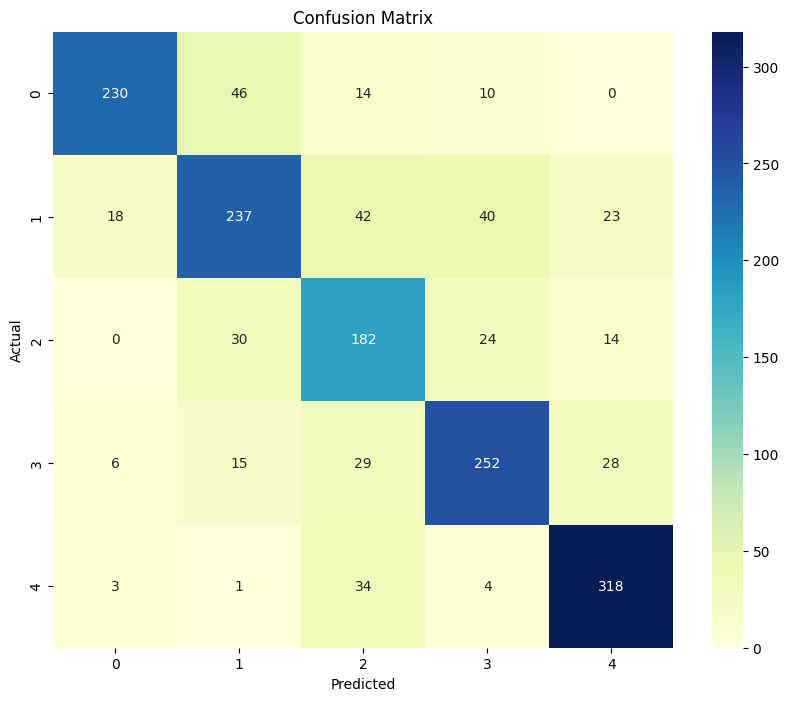

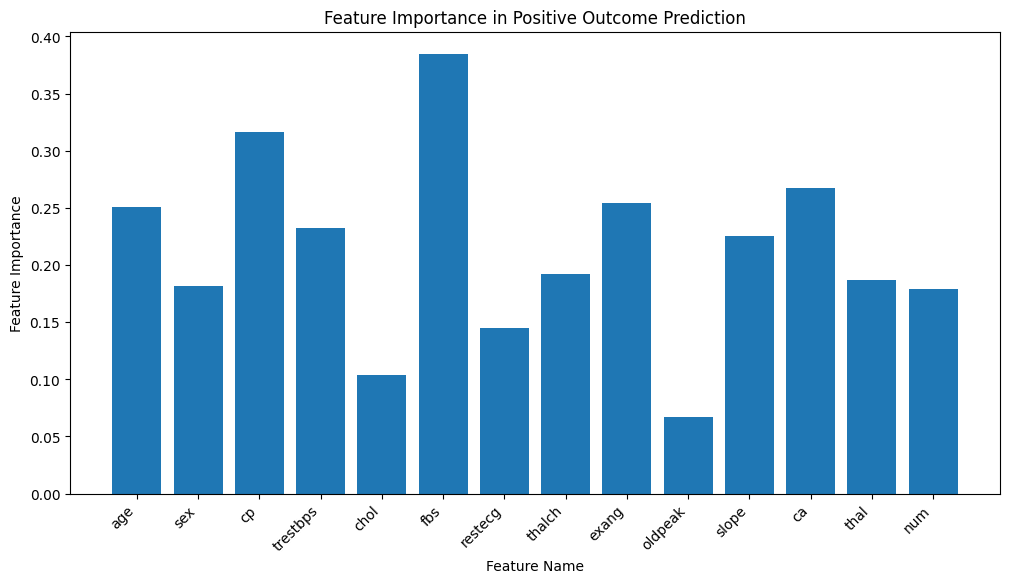

In [93]:
from matplotlib import pyplot as plt
import numpy as np
import seaborn as sns
import torch
from sklearn.preprocessing import MinMaxScaler
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# Create the confusion matrix
conf_matrix = confusion_matrix(all_labels, all_predicted)

# Calculate accuracy, precision, recall, and F1 score
accuracy = accuracy_score(all_labels, all_predicted)
precision = precision_score(all_labels, all_predicted, average='weighted')
recall = recall_score(all_labels, all_predicted, average='weighted')
f1 = f1_score(all_labels, all_predicted, average='weighted')

# Print the metrics
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="YlGnBu", xticklabels=np.unique(all_labels), yticklabels=np.unique(all_labels))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

learned_weights = model.fc.weight.detach().cpu().numpy()

feature_names = df.columns[:14]

feature_importance = np.abs(learned_weights).sum(axis=0)

plt.figure(figsize=(12, 6))
feature_importance = feature_importance[:14]
plt.bar(feature_names, feature_importance)
plt.xticks(rotation=45, ha="right")
plt.xlabel('Feature Name')
plt.ylabel('Feature Importance')
plt.title('Feature Importance in Positive Outcome Prediction')
plt.show()